<a href="https://colab.research.google.com/github/pillaisamarth/clg-proj/blob/main/Linear_Reg_Dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [ ]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from pandas_datareader.data import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 484 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


# **Setting Default plotting styles**

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'

# **Fetching Stock prices using yfinance Library**

In this section we will get stock prices over four years for Google and Microsoft. However, for analysis, we will focus on Google stock prices for this entire program

In [ ]:
tech_list = [
    'GOOG',
    'MSFT'
]

end = datetime.now()
start = datetime(end.year - 4, end.month, end.day)

for stocks in tech_list:
    globals()[stocks] = yf.download(stocks, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# **Function Definitions**

In This section, we will describe some functions later used in the program



In [ ]:
def min_max_1000(df):
  sd = df.copy()
  sd['Close'] = (sd['Close'] - sd['Close'].min()) / sd['Close'].max()
  sd['Close'] = sd['Close'] * 1000
  return sd

In [ ]:
from sklearn.model_selection import train_test_split
def data_split(X, y, test_size = 0.2):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, shuffle = False)
  return (X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score
def get_score(y_true, y_pred):
  return mean_squared_error(y_true, y_pred)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

# Creating DataFrame for Google Stock prices




In [ ]:
df = pd.DataFrame(GOOG[['Close']].copy())
df.head()

,Close
Date,
2018-11-27,52.220501
2018-11-28,54.311501
2018-11-29,54.415001
2018-11-30,54.721500
2018-12-03,55.321499


In [ ]:
sd = df.copy()
sd.head()

,Close
Date,
2018-11-27,52.220501
2018-11-28,54.311501
2018-11-29,54.415001
2018-11-30,54.721500
2018-12-03,55.321499


# Creating Dummy Variable

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
split_date_1 = '01-Jan-2022' #train to validate
split_date_2 = '05-June-2022' #validate to test
sd_train = sd.loc[sd.index <= split_date_1].copy()
sd_valid = sd.loc[(sd.index > split_date_1) & (sd.index < split_date_2)].copy()
sd_test = sd.loc[sd.index > split_date_2].copy()

In [ ]:
dummy = pd.DataFrame(np.arange(len(df.index)), index = df.index)

In [ ]:
X_train, X_test, y_train, y_test = data_split(dummy, df)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = pd.DataFrame(model.predict(X_test).reshape(-1), index = X_test.index)
y_train_pred = pd.DataFrame(model.predict(X_train).reshape(-1), index = X_train.index)

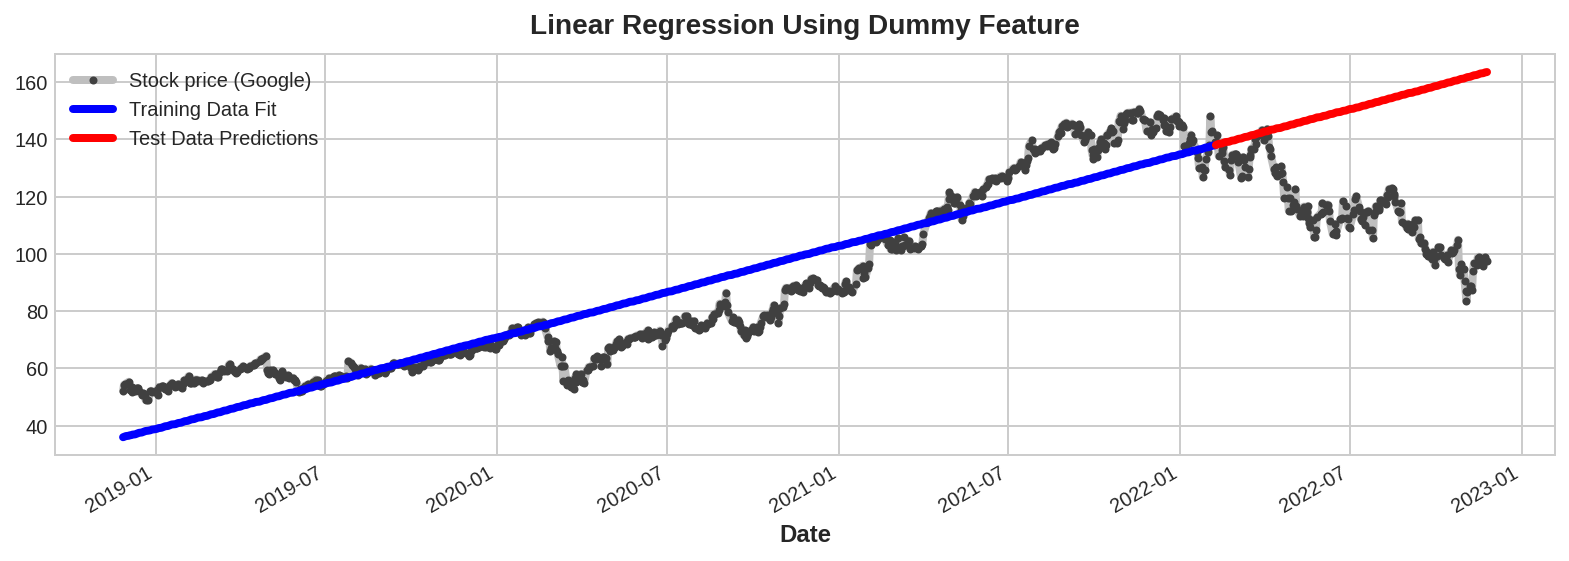

In [ ]:
ax = df['Close'].plot(**plot_params)
ax = y_train_pred.plot(ax = ax, color = 'b')
ax = y_pred.plot(ax = ax, color = 'r')
ax.set_title('Linear Regression Using Dummy Feature')
ax.legend(['Stock price (Google)', 'Training Data Fit', 'Test Data Predictions'])

In [ ]:
error = mean_absolute_percentage_error(y_true = y_test, y_pred = y_pred)
print(error)

33.73492289927937
